In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# 【問題1】データの可視化

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
ndarray_fuji = np.array(fuji)

In [5]:
ndarray_fuji[:,0]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Text(0.5, 1.0, 'Mt.Fuji')

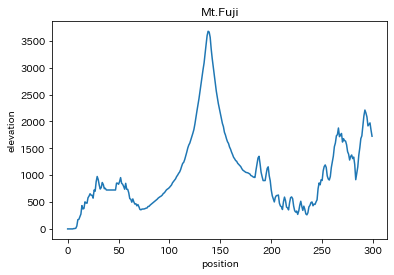

In [6]:
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
plt.xlabel('position')
plt.ylabel('elevation')
plt.title('Mt.Fuji')

# 【問題2】ある地点の勾配を計算する関数を作成

In [7]:
def calculate_grad(position):
    delta_x = ndarray_fuji[:, 0][position] - ndarray_fuji[:, 0][position - 1]
    delta_y = ndarray_fuji[:, 3][position] - ndarray_fuji[:, 3][position - 1]
    grad = delta_y/delta_x
    return grad

In [8]:
calculate_grad(160)

-40.84999999999991

# 【問題3】移動先の地点を計算する関数を作成

In [9]:
from decimal import Decimal, ROUND_HALF_UP

In [10]:
def calculate_point(point, alpha=0.2):
    destination_point = point - alpha*calculate_grad(point)
    if 0 <= destination_point < 300:
        return int(Decimal(str(destination_point)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    elif destination_point >= 300:
        return 299
    else:
        return 0

In [11]:
print(type(Decimal(9.5).quantize(Decimal('0'), rounding=ROUND_HALF_UP)))
print(Decimal(9.5).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
print(type(int(Decimal(9.5).quantize(Decimal('0'), rounding=ROUND_HALF_UP))))
print(int(Decimal(9.5).quantize(Decimal('0'), rounding=ROUND_HALF_UP)))


<class 'decimal.Decimal'>
10
<class 'int'>
10


In [12]:
calculate_point(95)

93

In [13]:
calculate_point(100)

96

# 【問題4】山を下る関数を作成

In [14]:
def move(start_point, alpha=0.01):
    point_list = []
    point_list.append(start_point)
    flag = True
    while flag:
        point_list.append(calculate_point(point_list[-1], alpha))
        if point_list[-1] == point_list[-2]:
            flag = False
        if ndarray_fuji[:, 3][point_list[-1]] > ndarray_fuji[:, 3][point_list[-2]]:
            print('start_point:{}、alphaを調整してください'.format(start_point))
            flag = False
    return point_list

In [15]:
move(136, 0.01)

[136,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 120]

# 【問題5】下山過程の可視化

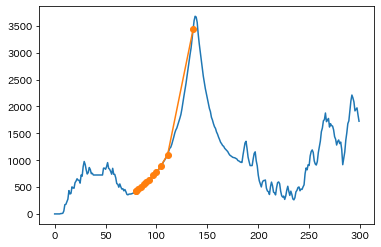

In [16]:
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
move_list = move(136, 0.15)
height_list = []
for i in range(len(move_list)):
    height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(move_list, height_list, marker='o')

# 【問題6】初期値の変更

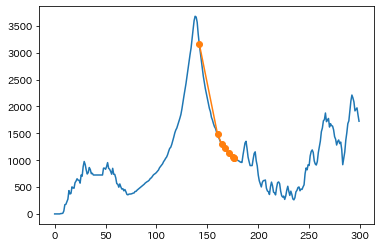

In [17]:
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
move_list = move(142, 0.1)
height_list = []
for i in range(len(move_list)):
    height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(move_list, height_list, marker='o')

start_point:201、alphaを調整してください
start_point:251、alphaを調整してください


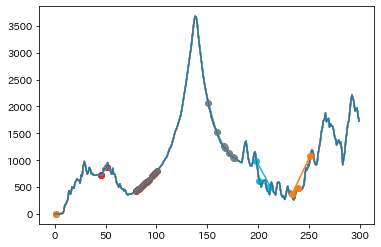

In [18]:
for i in range(1, len(ndarray_fuji[:, 0]), 50):
    move_list = move(i, 0.1)
    height_list = []
    for i in range(len(move_list)):
        height_list.append(ndarray_fuji[:, 3][move_list[i]])
    plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
    plt.plot(move_list, height_list, marker='o')

start_point:50、alphaを調整してください


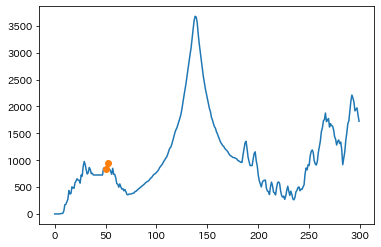

In [19]:
move_list = move(50, 0.1)
height_list = []
for i in range(len(move_list)):
     height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
plt.plot(move_list, height_list, marker='o')

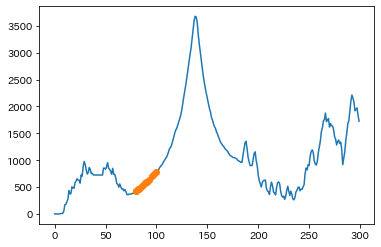

In [20]:
move_list = move(100, 0.1)
height_list = []
for i in range(len(move_list)):
     height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
plt.plot(move_list, height_list, marker='o')

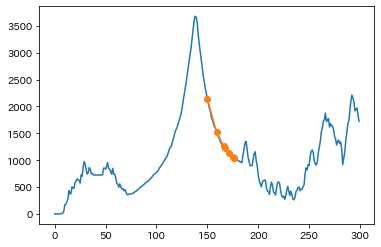

In [21]:
move_list = move(150, 0.1)
height_list = []
for i in range(len(move_list)):
     height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
plt.plot(move_list, height_list, marker='o')

start_point:200、alphaを調整してください


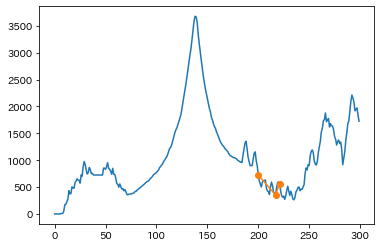

In [22]:
move_list = move(200, 0.1)
height_list = []
for i in range(len(move_list)):
     height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
plt.plot(move_list, height_list, marker='o')

start_point:250、alphaを調整してください


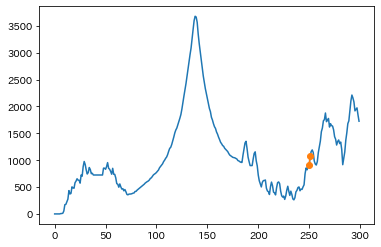

In [23]:
move_list = move(250, 0.1)
height_list = []
for i in range(len(move_list)):
     height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
plt.plot(move_list, height_list, marker='o')

# 【問題7】（アドバンス問題）ハイパーパラメータの変更

start_point:142、alphaを調整してください


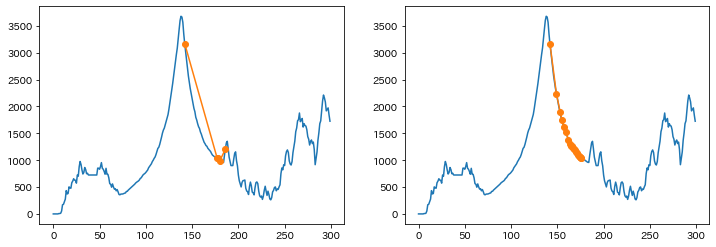

In [24]:
fig = plt.figure(figsize=(12, 4))
ax = plt.axes()
plt.subplot(1,2,1)
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
move_list = move(142, 0.2)
height_list = []
for i in range(len(move_list)):
    height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(move_list, height_list, marker='o')

plt.subplot(1,2,2)
plt.plot(ndarray_fuji[:, 0],ndarray_fuji[:, 3])
move_list = move(142, 0.04)
height_list = []
for i in range(len(move_list)):
    height_list.append(ndarray_fuji[:, 3][move_list[i]])
plt.plot(move_list, height_list, marker='o')